In [20]:
pip install numpy pandas matplotlib seaborn scipy openpyxl tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')


# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [12]:
df = pd.read_csv("turkiye.csv")

df.head(8)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## Удаляем выбросы

In [13]:
df = pd.read_csv("turkiye.csv")

# Вопросы Q1–Q28
q_cols = [f'Q{i}' for i in range(1, 29)]

# Функция: ≥26 одинаковых ответов
def has_too_many_identical_answers(row):
    return row.value_counts().max() >= 26

# Маска аномальных ответов
mask_identical = df[q_cols].apply(has_too_many_identical_answers, axis=1)

# Подсчёты
n_identical = mask_identical.sum()
n_low_attendance = (df['attendance'] < 2).sum()

# Распределение по Attendance
dist_attendance_all = df['attendance'].value_counts().sort_index()

# Распределение по Attendance среди "одинаковых" записей
dist_attendance = df[mask_identical]['attendance'].value_counts().sort_index()

# Вывод
print(f"Студентов с ≥26 одинаковыми ответами: {n_identical}")
print(f"Студентов с посещаемостью < 2: {n_low_attendance}")

print("\nРаспределение по Attendance")
print(dist_attendance_all.to_string())

print("\nРаспределение по Attendance среди записей с ≥26 одинаковыми ответами:")
print(dist_attendance.to_string())

mask_A = df[q_cols].apply(has_too_many_identical_answers, axis=1)
mask_B = df['attendance'] < 2

# Пересечение
mask_intersection = mask_A | mask_B
n_intersection = mask_intersection.sum()

print(f"Число записей с ≥27 одинаковыми ответами ИЛИ посещаемостью < 2: {n_intersection}")

Студентов с ≥26 одинаковыми ответами: 3409
Студентов с посещаемостью < 2: 2930

Распределение по Attendance
attendance
0    1902
1    1028
2     792
3    1252
4     846

Распределение по Attendance среди записей с ≥26 одинаковыми ответами:
attendance
0    1292
1     599
2     434
3     624
4     460
Число записей с ≥27 одинаковыми ответами ИЛИ посещаемостью < 2: 4448


### Повторы и одинаковые ответы

In [14]:
df = pd.read_csv("turkiye.csv")

print(f"Исходное количество строк: {len(df)}")

# Колонки с вопросами Q1–Q28
q_cols = [f'Q{i}' for i in range(1, 29)]

# 1. Удаляем строки, где 26 или более ответов одинаковые
def has_too_many_identical_answers(row):
    # Считаем частоту каждого значения в строке
    value_counts = row.value_counts()
    # Если максимальная частота >= 26 — считаем аномалией
    # print(value_counts)
    # print(value_counts.max() >= 26)
    # print('-'*10)
    return value_counts.max() >= 26

mask_identical = df[q_cols].apply(has_too_many_identical_answers, axis=1)
# df[mask_identical].to_excel('удалённые_одинаковые_ответы2.xlsx', index=False)

removed_identical = mask_identical.sum()
df = df[~mask_identical].copy()

print(f"Удалено строк с ≥26 одинаковыми ответами: {removed_identical}")


# 2. Удаляем записи с посещаемостью ниже 2 (Attendance < 2)
removed_low_attendance = (df['attendance'] < 2).sum()
df = df[df['attendance'] >= 2].copy()

print(f"Удалено строк с посещаемостью ниже 2: {removed_low_attendance}")
print(f"Итоговое количество строк после очистки: {len(df)}")

Исходное количество строк: 5820
Удалено строк с ≥26 одинаковыми ответами: 3409
Удалено строк с посещаемостью ниже 2: 1039
Итоговое количество строк после очистки: 1372


### Поиск выбросов по квартилям (метод IQR) — по каждому признаку отдельно

In [15]:
k = 1.5
outlier_mask_iqr = pd.Series([False] * len(df), index=df.index)

for col in q_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outlier_mask_iqr |= (df[col] < lower_bound) | (df[col] > upper_bound)

n_outliers_iqr = outlier_mask_iqr.sum()

df = df[~outlier_mask_iqr].copy()

print(f"Число выбросов, обнаруженных методом IQR: {n_outliers_iqr}")
print(f"Итоговое количество строк после очистки: {len(df)}")

Число выбросов, обнаруженных методом IQR: 349
Итоговое количество строк после очистки: 1023


## Код для анализа PCA третьего предмета (b)

In [ ]:
# ============================================================
# ВЫБОР ДАННЫХ ПО ОДНОМУ ПРЕДМЕТУ (3)
# ============================================================

print("\n" + "="*60)
print("ПРЕДМЕТ CLASS = 3")
print("="*60)

df_class3 = df[df['class'] == 3].copy()

# ============================================================
# ПОДГОТОВКА ДАННЫХ ДЛЯ PCA
# ============================================================

# Выбираем только вопросы Q1-Q28
question_cols = [f'Q{i}' for i in range(1, 29)]

# Проверяем наличие всех столбцов
available_cols = [col for col in question_cols if col in df_class3.columns]

# Извлекаем данные по вопросам
X = df_class3[available_cols].values

print(f"\nРазмерность данных для PCA: {X.shape}")

# Стандартизация данных
X_scaled = scale(X)

# ============================================================
# ПРИМЕНЕНИЕ PCA
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (PCA)")
print("="*60)

# Создание и обучение PCA
pca = PCA(svd_solver='full')
pca.fit(X_scaled)

# Преобразование данных
X_pca = pca.transform(X_scaled)

print(f"Размерность данных после PCA: {X_pca.shape}")

# Объяснённая дисперсия
print("\nОбъяснённая дисперсия каждой компонентой:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i:2d}: {var:.6f} ({var*100:.2f}%)")

# Кумулятивная дисперсия
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
print("\nКумулятивная объяснённая дисперсия:")
for i in [1, 2, 3, 4, 5, len(cumulative_var)]:
    if i <= len(cumulative_var):
        print(f"{i:2d} компонент: {cumulative_var[i-1]:.6f} ({cumulative_var[i-1]*100:.2f}%)")

# Количество компонент для 70%, 80% и 90% дисперсии
n_comp_70 = np.argmax(cumulative_var >= 0.70) + 1
n_comp_80 = np.argmax(cumulative_var >= 0.80) + 1
n_comp_90 = np.argmax(cumulative_var >= 0.90) + 1

print(f"\nКоличество компонент для 70% дисперсии: {n_comp_80}")
print(f"\nКоличество компонент для 80% дисперсии: {n_comp_80}")
print(f"Количество компонент для 90% дисперсии: {n_comp_90}")

# ============================================================
# АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (LOADINGS)
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ НАГРУЗОК (LOADINGS) ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Создаём DataFrame с нагрузками (веса признаков в компонентах)
n_components_show = min(5, X.shape[1])  # Показываем первые 5 компонент
loadings = pd.DataFrame(
    pca.components_[:n_components_show].T,
    columns=[f'PC{i+1}' for i in range(n_components_show)],
    index=available_cols
)

print(f"\nНагрузки признаков в первых {n_components_show} главных компонентах:")
print(loadings.round(3))

# ============================================================
# ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ
# ============================================================

print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Анализ PC1 (первая главная компонента)
print("\n--- PC1 (Первая главная компонента) ---")
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC1:")
for i, (q, val) in enumerate(pc1_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings.loc[q, 'PC1']:.3f} (|{val:.3f}|)")

# Анализ PC2
print("\n--- PC2 (Вторая главная компонента) ---")
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC2:")
for i, (q, val) in enumerate(pc2_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings.loc[q, 'PC2']:.3f} (|{val:.3f}|)")

# Анализ PC3
print("\n--- PC3 (Третья главная компонента) ---")
pc3_loadings = loadings['PC3'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC3:")
for i, (q, val) in enumerate(pc3_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings.loc[q, 'PC3']:.3f} (|{val:.3f}|)")

# ============================================================
# 7. ВИЗУАЛИЗАЦИЯ
# ============================================================

# График 1: Кумулятивная дисперсия
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Номер главной компоненты', fontsize=11)
axes[0].set_ylabel('Объяснённая дисперсия', fontsize=11)
axes[0].set_title('Объяснённая дисперсия каждой компонентой (Class 3)', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_var) + 1), cumulative_var, 
             marker='o', linewidth=2, markersize=5, color='steelblue')
axes[1].axhline(y=0.80, color='red', linestyle='--', linewidth=2, label='80% дисперсии')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% дисперсии')
axes[1].axvline(x=n_comp_80, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Количество главных компонент', fontsize=11)
axes[1].set_ylabel('Кумулятивная объяснённая дисперсия', fontsize=11)
axes[1].set_title('Кумулятивная объяснённая дисперсия PCA (Class 3)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('pca_class3_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# График 2: Heatmap нагрузок первых 3 компонент
plt.figure(figsize=(8, 10))
sns.heatmap(loadings[['PC1', 'PC2', 'PC3']], annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, cbar_kws={'label': 'Нагрузка'})
plt.title('Нагрузки признаков в первых 3 главных компонентах (Class 3)', fontsize=12)
plt.xlabel('Главные компоненты', fontsize=11)
plt.ylabel('Вопросы', fontsize=11)
plt.tight_layout()
plt.savefig('pca_class3_loadings_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Данные по двум предметам, которые ведутся одним преподавателем (с)

In [25]:
print("\n" + "="*70)
print("РАСПРЕДЕЛЕНИЕ: ПРЕПОДАВАТЕЛЬ | ПРЕДМЕТ | КОЛИЧЕСТВО ОЦЕНОК")
print("="*70)

# Группировка по преподавателю и предмету
summary = df.groupby(['instr', 'class']).size().reset_index(name='Количество оценок')
summary.columns = ['Преподаватель', 'Предмет', 'Количество оценок']

print(summary.to_string(index=False))


РАСПРЕДЕЛЕНИЕ: ПРЕПОДАВАТЕЛЬ | ПРЕДМЕТ | КОЛИЧЕСТВО ОЦЕНОК
 Преподаватель  Предмет  Количество оценок
             1        2                 14
             1        7                 47
             1       10                 67
             2        1                 62
             2        6                 99
             2       11                 90
             2       13                 33
             3        3                112
             3        4                 35
             3        5                135
             3        8                147
             3        9                 98
             3       12                  7
             3       13                 77



ДВА ПРЕДМЕТА ПРЕПОДАВАТЕЛЯ 1: CLASS 5 И CLASS 8
Class 5 (преподаватель 3): 135 наблюдений
Class 8 (преподаватель 3): 147 наблюдений
Общее количество наблюдений: 282

Размерность данных для PCA: (282, 28)

АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (PCA)
Размерность данных после PCA: (282, 28)

Объяснённая дисперсия каждой компонентой:
PC 1: 0.430203 (43.02%)
PC 2: 0.114271 (11.43%)
PC 3: 0.052319 (5.23%)
PC 4: 0.040362 (4.04%)
PC 5: 0.038453 (3.85%)
PC 6: 0.029858 (2.99%)
PC 7: 0.027720 (2.77%)
PC 8: 0.023243 (2.32%)
PC 9: 0.021387 (2.14%)
PC10: 0.020516 (2.05%)
PC11: 0.017157 (1.72%)
PC12: 0.016776 (1.68%)
PC13: 0.015675 (1.57%)
PC14: 0.015227 (1.52%)
PC15: 0.014484 (1.45%)
PC16: 0.013602 (1.36%)
PC17: 0.013062 (1.31%)
PC18: 0.011966 (1.20%)
PC19: 0.011597 (1.16%)
PC20: 0.010657 (1.07%)
PC21: 0.009575 (0.96%)
PC22: 0.009168 (0.92%)
PC23: 0.008471 (0.85%)
PC24: 0.007867 (0.79%)
PC25: 0.007478 (0.75%)
PC26: 0.007235 (0.72%)
PC27: 0.006742 (0.67%)
PC28: 0.004928 (0.49%)

Кумулятивная объяснённая дисперси

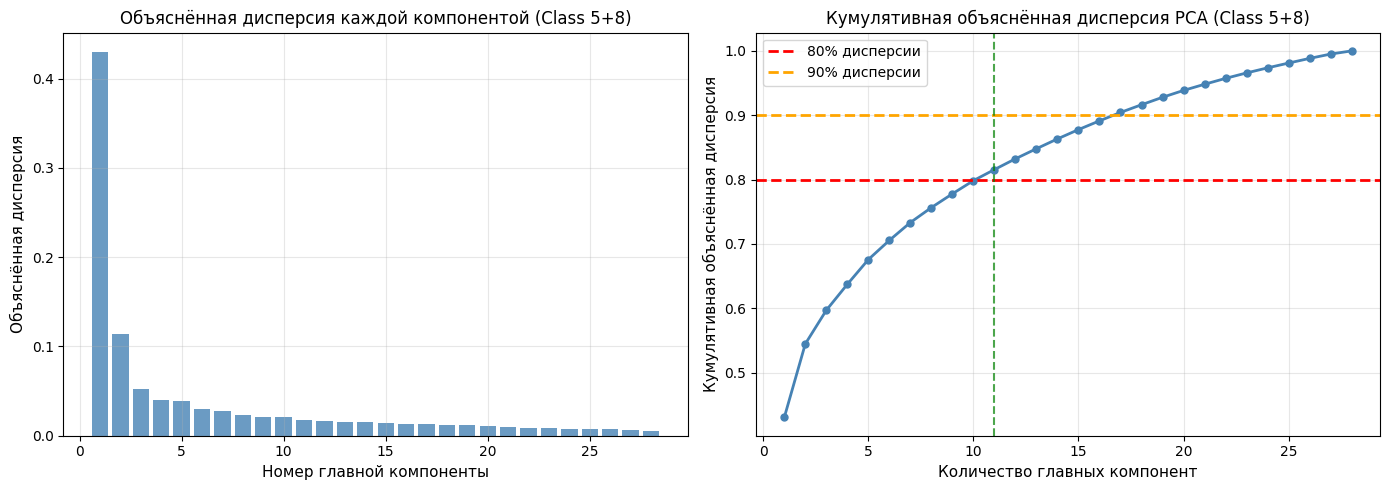

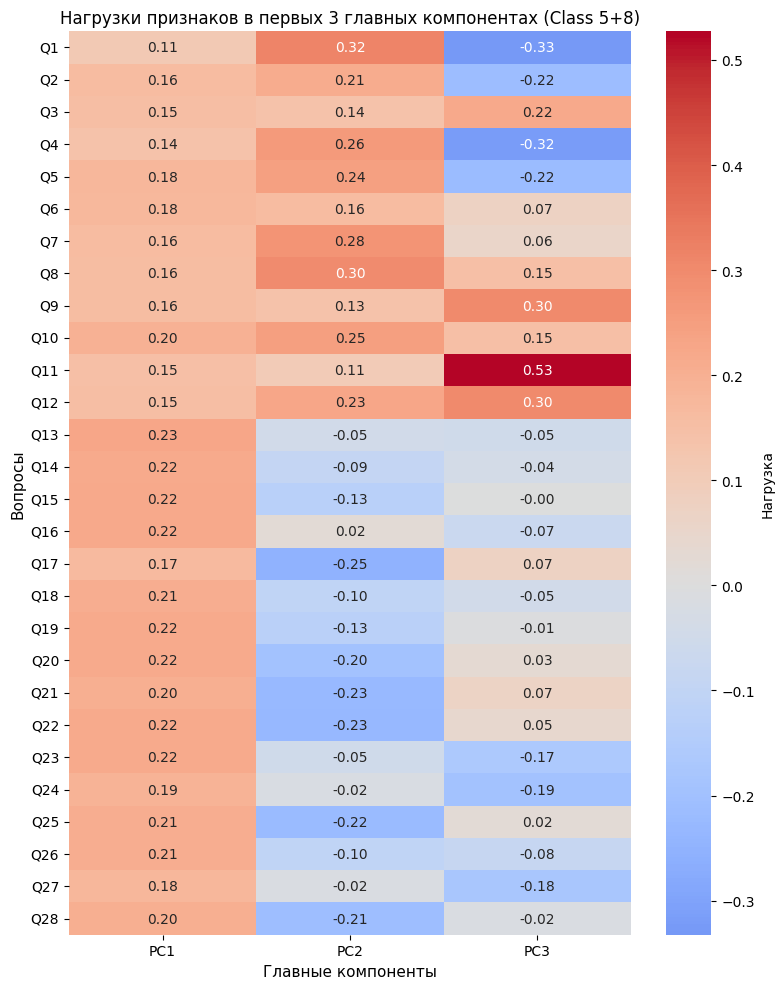

In [27]:
# ============================================================
# ВЫБОР ДАННЫХ ПО ДВУМ ПРЕДМЕТАМ ОДНОГО ПРЕПОДАВАТЕЛЯ
# ============================================================

print("\n" + "="*60)
print("ДВА ПРЕДМЕТА ПРЕПОДАВАТЕЛЯ 1: CLASS 5 И CLASS 8")
print("="*60)

# Выбираем два предмета преподавателя 1
df_class5_instr1 = df[(df['instr'] == 3) & (df['class'] == 5)].copy()
df_class8_instr1 = df[(df['instr'] == 3) & (df['class'] == 8)].copy()

print(f"Class 5 (преподаватель 3): {len(df_class5_instr1)} наблюдений")
print(f"Class 8 (преподаватель 3): {len(df_class8_instr1)} наблюдений")

# Объединяем данные двух предметов
df_two_classes = pd.concat([df_class5_instr1, df_class8_instr1], ignore_index=True)
print(f"Общее количество наблюдений: {len(df_two_classes)}")

# ============================================================
# ПОДГОТОВКА ДАННЫХ ДЛЯ PCA
# ============================================================

# Выбираем только вопросы Q1-Q28
question_cols = [f'Q{i}' for i in range(1, 29)]

# Проверяем наличие всех столбцов
available_cols = [col for col in question_cols if col in df_two_classes.columns]

# Извлекаем данные по вопросам
X_two = df_two_classes[available_cols].values

print(f"\nРазмерность данных для PCA: {X_two.shape}")

# Стандартизация данных
X_two_scaled = scale(X_two)

# ============================================================
# ПРИМЕНЕНИЕ PCA
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (PCA)")
print("="*60)

# Создание и обучение PCA
pca_two = PCA(svd_solver='full')
pca_two.fit(X_two_scaled)

# Преобразование данных
X_two_pca = pca_two.transform(X_two_scaled)

print(f"Размерность данных после PCA: {X_two_pca.shape}")

# Объяснённая дисперсия
print("\nОбъяснённая дисперсия каждой компонентой:")
for i, var in enumerate(pca_two.explained_variance_ratio_, 1):
    print(f"PC{i:2d}: {var:.6f} ({var*100:.2f}%)")

# Кумулятивная дисперсия
cumulative_var_two = np.cumsum(pca_two.explained_variance_ratio_)
print("\nКумулятивная объяснённая дисперсия:")
for i in [1, 2, 3, 4, 5, len(cumulative_var_two)]:
    if i <= len(cumulative_var_two):
        print(f"{i:2d} компонент: {cumulative_var_two[i-1]:.6f} ({cumulative_var_two[i-1]*100:.2f}%)")

# Количество компонент для 70%, 80% и 90% дисперсии
n_comp_70_two = np.argmax(cumulative_var_two >= 0.70) + 1
n_comp_80_two = np.argmax(cumulative_var_two >= 0.80) + 1
n_comp_90_two = np.argmax(cumulative_var_two >= 0.90) + 1

print(f"\nКоличество компонент для 70% дисперсии: {n_comp_70_two}")
print(f"Количество компонент для 80% дисперсии: {n_comp_80_two}")
print(f"Количество компонент для 90% дисперсии: {n_comp_90_two}")

# ============================================================
# АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (LOADINGS)
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ НАГРУЗОК (LOADINGS) ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Создаём DataFrame с нагрузками (веса признаков в компонентах)
n_components_show = min(5, X_two.shape[1])  # Показываем первые 5 компонент
loadings_two = pd.DataFrame(
    pca_two.components_[:n_components_show].T,
    columns=[f'PC{i+1}' for i in range(n_components_show)],
    index=available_cols
)

print(f"\nНагрузки признаков в первых {n_components_show} главных компонентах:")
print(loadings_two.round(3))

# ============================================================
# ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ
# ============================================================

print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Анализ PC1 (первая главная компонента)
print("\n--- PC1 (Первая главная компонента) ---")
pc1_loadings = loadings_two['PC1'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC1:")
for i, (q, val) in enumerate(pc1_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_two.loc[q, 'PC1']:.3f} (|{val:.3f}|)")

# Анализ PC2
print("\n--- PC2 (Вторая главная компонента) ---")
pc2_loadings = loadings_two['PC2'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC2:")
for i, (q, val) in enumerate(pc2_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_two.loc[q, 'PC2']:.3f} (|{val:.3f}|)")

# Анализ PC3
print("\n--- PC3 (Третья главная компонента) ---")
pc3_loadings = loadings_two['PC3'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC3:")
for i, (q, val) in enumerate(pc3_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_two.loc[q, 'PC3']:.3f} (|{val:.3f}|)")

# ============================================================
# СРАВНЕНИЕ С ОДНИМ ПРЕДМЕТОМ
# ============================================================

print("\n" + "="*60)
print("СРАВНЕНИЕ С ОДНИМ ПРЕДМЕТОМ (CLASS 3)")
print("="*60)

# Сравнение объяснённой дисперсии PC1
# Предполагается, что переменная pca из предыдущего блока кода сохранена
print("\nСравнение объяснённой дисперсии PC1:")
print(f"  Один предмет (Class 3): {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  Два предмета (Class 5+8): {pca_two.explained_variance_ratio_[0]:.4f} ({pca_two.explained_variance_ratio_[0]*100:.2f}%)")

# Корреляция нагрузок PC1
correlation_pc1 = loadings['PC1'].corr(loadings_two['PC1'])
print(f"\nКорреляция нагрузок PC1: {correlation_pc1:.4f}")

# Сравнение количества компонент для 80% дисперсии
print(f"\nКоличество компонент для 80% дисперсии:")
print(f"  Один предмет (Class 3): {n_comp_80}")
print(f"  Два предмета (Class 5+8): {n_comp_80_two}")

# ============================================================
# ВИЗУАЛИЗАЦИЯ
# ============================================================

# График 1: Кумулятивная дисперсия
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(pca_two.explained_variance_ratio_) + 1), 
            pca_two.explained_variance_ratio_, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Номер главной компоненты', fontsize=11)
axes[0].set_ylabel('Объяснённая дисперсия', fontsize=11)
axes[0].set_title('Объяснённая дисперсия каждой компонентой (Class 5+8)', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_var_two) + 1), cumulative_var_two, 
             marker='o', linewidth=2, markersize=5, color='steelblue')
axes[1].axhline(y=0.80, color='red', linestyle='--', linewidth=2, label='80% дисперсии')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% дисперсии')
axes[1].axvline(x=n_comp_80_two, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Количество главных компонент', fontsize=11)
axes[1].set_ylabel('Кумулятивная объяснённая дисперсия', fontsize=11)
axes[1].set_title('Кумулятивная объяснённая дисперсия PCA (Class 5+8)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('pca_two_classes_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# График 2: Heatmap нагрузок первых 3 компонент
plt.figure(figsize=(8, 10))
sns.heatmap(loadings_two[['PC1', 'PC2', 'PC3']], annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, cbar_kws={'label': 'Нагрузка'})
plt.title('Нагрузки признаков в первых 3 главных компонентах (Class 5+8)', fontsize=12)
plt.xlabel('Главные компоненты', fontsize=11)
plt.ylabel('Вопросы', fontsize=11)
plt.tight_layout()
plt.savefig('pca_two_classes_loadings_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Данные по двум предметам, которые ведутся одним преподавателем (d)


ВЕСЬ НАБОР ДАННЫХ (ВСЕ ПРЕДМЕТЫ И ПРЕПОДАВАТЕЛИ)
Общее количество наблюдений: 1023
Количество преподавателей: 3
Количество предметов: 13

Размерность данных для PCA: (1023, 28)

АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (PCA)
Размерность данных после PCA: (1023, 28)

Объяснённая дисперсия каждой компонентой:
PC 1: 0.469186 (46.92%)
PC 2: 0.114900 (11.49%)
PC 3: 0.042584 (4.26%)
PC 4: 0.037226 (3.72%)
PC 5: 0.031684 (3.17%)
PC 6: 0.025714 (2.57%)
PC 7: 0.022775 (2.28%)
PC 8: 0.020765 (2.08%)
PC 9: 0.020357 (2.04%)
PC10: 0.017184 (1.72%)
PC11: 0.016552 (1.66%)
PC12: 0.015719 (1.57%)
PC13: 0.014760 (1.48%)
PC14: 0.013770 (1.38%)
PC15: 0.013418 (1.34%)
PC16: 0.012823 (1.28%)
PC17: 0.012083 (1.21%)
PC18: 0.011469 (1.15%)
PC19: 0.011088 (1.11%)
PC20: 0.010696 (1.07%)
PC21: 0.010210 (1.02%)
PC22: 0.009470 (0.95%)
PC23: 0.009055 (0.91%)
PC24: 0.008296 (0.83%)
PC25: 0.008108 (0.81%)
PC26: 0.007593 (0.76%)
PC27: 0.006394 (0.64%)
PC28: 0.006121 (0.61%)

Кумулятивная объяснённая дисперсия:
 1 компонент: 0.469186 

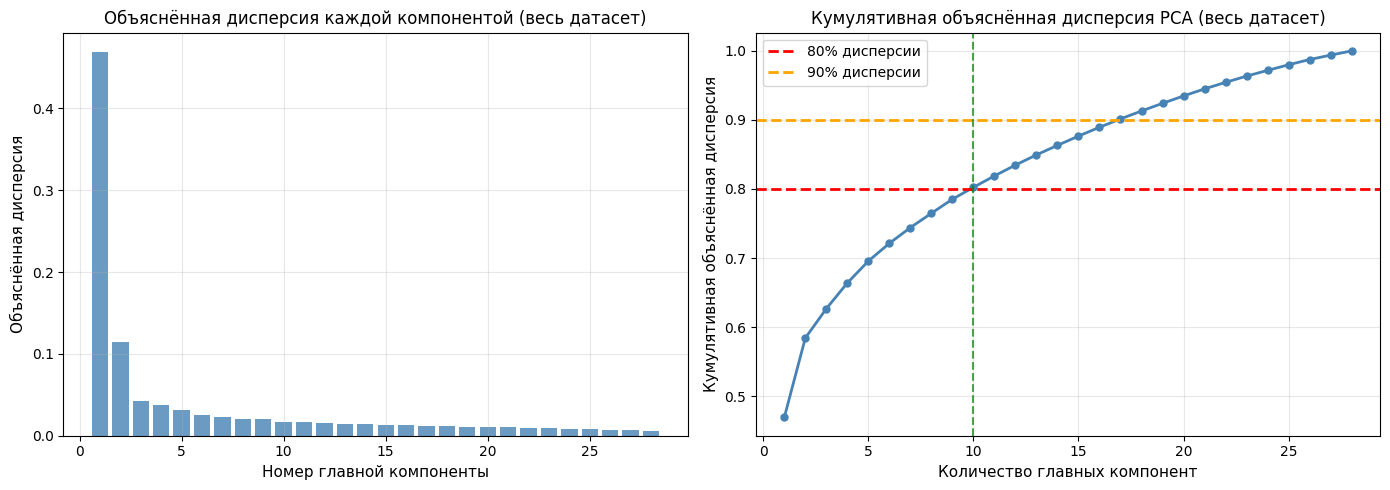

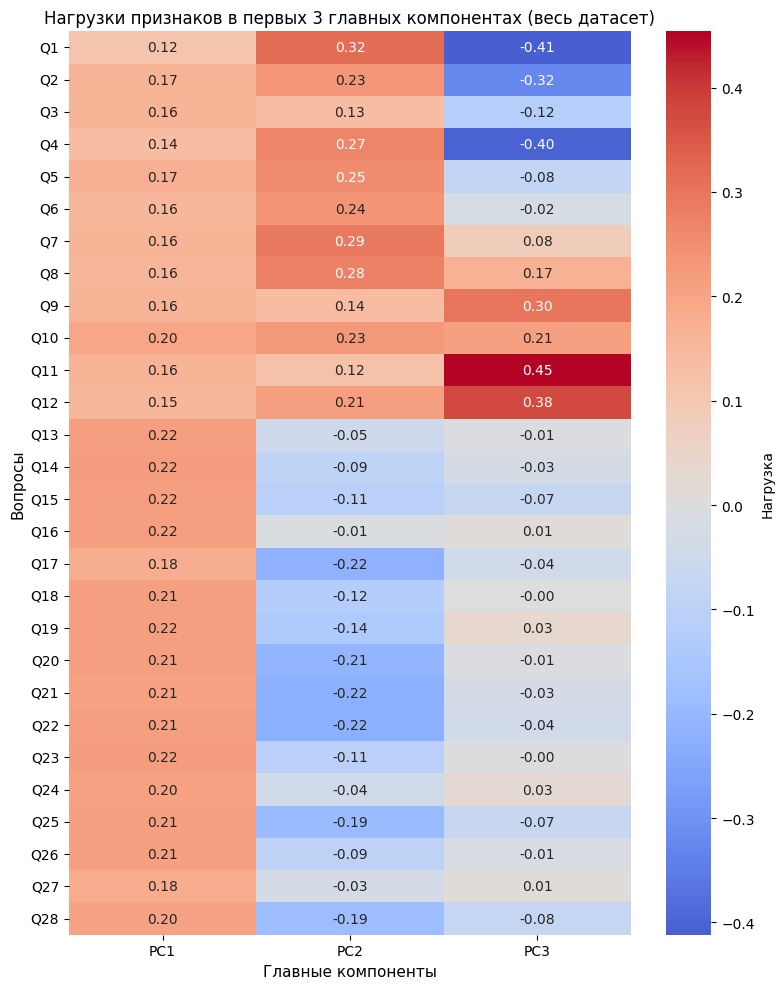

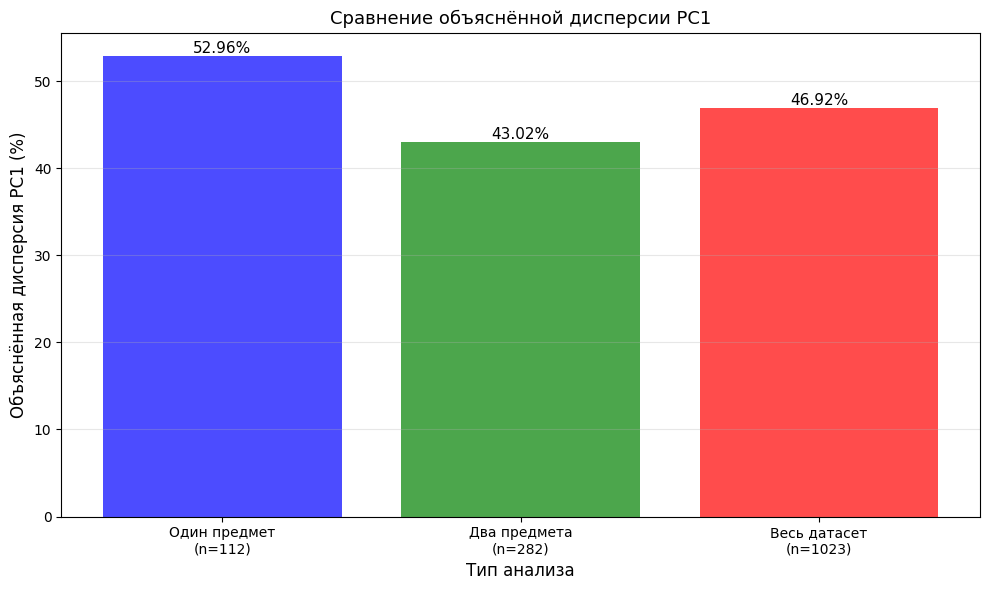


АНАЛИЗ PCA ДЛЯ ВСЕГО ДАТАСЕТА ЗАВЕРШЁН


In [28]:
# ============================================================
# ВЫБОР ВСЕГО НАБОРА ДАННЫХ
# ============================================================

print("\n" + "="*60)
print("ВЕСЬ НАБОР ДАННЫХ (ВСЕ ПРЕДМЕТЫ И ПРЕПОДАВАТЕЛИ)")
print("="*60)

df_all = df.copy()

print(f"Общее количество наблюдений: {len(df_all)}")
print(f"Количество преподавателей: {df_all['instr'].nunique()}")
print(f"Количество предметов: {df_all['class'].nunique()}")

# ============================================================
# ПОДГОТОВКА ДАННЫХ ДЛЯ PCA
# ============================================================

# Выбираем только вопросы Q1-Q28
question_cols = [f'Q{i}' for i in range(1, 29)]

# Проверяем наличие всех столбцов
available_cols = [col for col in question_cols if col in df_all.columns]

# Извлекаем данные по вопросам
X_all = df_all[available_cols].values

print(f"\nРазмерность данных для PCA: {X_all.shape}")

# Стандартизация данных
X_all_scaled = scale(X_all)

# ============================================================
# ПРИМЕНЕНИЕ PCA
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (PCA)")
print("="*60)

# Создание и обучение PCA
pca_all = PCA(svd_solver='full')
pca_all.fit(X_all_scaled)

# Преобразование данных
X_all_pca = pca_all.transform(X_all_scaled)

print(f"Размерность данных после PCA: {X_all_pca.shape}")

# Объяснённая дисперсия
print("\nОбъяснённая дисперсия каждой компонентой:")
for i, var in enumerate(pca_all.explained_variance_ratio_, 1):
    print(f"PC{i:2d}: {var:.6f} ({var*100:.2f}%)")

# Кумулятивная дисперсия
cumulative_var_all = np.cumsum(pca_all.explained_variance_ratio_)
print("\nКумулятивная объяснённая дисперсия:")
for i in [1, 2, 3, 4, 5, len(cumulative_var_all)]:
    if i <= len(cumulative_var_all):
        print(f"{i:2d} компонент: {cumulative_var_all[i-1]:.6f} ({cumulative_var_all[i-1]*100:.2f}%)")

# Количество компонент для 70%, 80% и 90% дисперсии
n_comp_70_all = np.argmax(cumulative_var_all >= 0.70) + 1
n_comp_80_all = np.argmax(cumulative_var_all >= 0.80) + 1
n_comp_90_all = np.argmax(cumulative_var_all >= 0.90) + 1

print(f"\nКоличество компонент для 70% дисперсии: {n_comp_70_all}")
print(f"Количество компонент для 80% дисперсии: {n_comp_80_all}")
print(f"Количество компонент для 90% дисперсии: {n_comp_90_all}")

# ============================================================
# АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ (LOADINGS)
# ============================================================

print("\n" + "="*60)
print("АНАЛИЗ НАГРУЗОК (LOADINGS) ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Создаём DataFrame с нагрузками (веса признаков в компонентах)
n_components_show = min(5, X_all.shape[1])  # Показываем первые 5 компонент
loadings_all = pd.DataFrame(
    pca_all.components_[:n_components_show].T,
    columns=[f'PC{i+1}' for i in range(n_components_show)],
    index=available_cols
)

print(f"\nНагрузки признаков в первых {n_components_show} главных компонентах:")
print(loadings_all.round(3))

# ============================================================
# ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ
# ============================================================

print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ")
print("="*60)

# Анализ PC1 (первая главная компонента)
print("\n--- PC1 (Первая главная компонента) ---")
pc1_loadings = loadings_all['PC1'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC1:")
for i, (q, val) in enumerate(pc1_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_all.loc[q, 'PC1']:.3f} (|{val:.3f}|)")

# Анализ PC2
print("\n--- PC2 (Вторая главная компонента) ---")
pc2_loadings = loadings_all['PC2'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC2:")
for i, (q, val) in enumerate(pc2_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_all.loc[q, 'PC2']:.3f} (|{val:.3f}|)")

# Анализ PC3
print("\n--- PC3 (Третья главная компонента) ---")
pc3_loadings = loadings_all['PC3'].abs().sort_values(ascending=False)
print(f"\nТоп-5 вопросов с наибольшим влиянием на PC3:")
for i, (q, val) in enumerate(pc3_loadings.head(5).items(), 1):
    print(f"  {i}. {q}: {loadings_all.loc[q, 'PC3']:.3f} (|{val:.3f}|)")

# ============================================================
# СРАВНЕНИЕ С ПРЕДЫДУЩИМИ АНАЛИЗАМИ
# ============================================================

print("\n" + "="*60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*60)

# Создание сравнительной таблицы
comparison_table = pd.DataFrame({
    'Анализ': [
        'Один предмет (Class 3)',
        'Два предмета (Class 5+8)',
        'Весь датасет'
    ],
    'Объем выборки': [
        len(df[df['class'] == 3]),
        282,
        len(df_all)
    ],
    'PC1 (%)': [
        pca.explained_variance_ratio_[0] * 100,
        pca_two.explained_variance_ratio_[0] * 100,
        pca_all.explained_variance_ratio_[0] * 100
    ],
    'PC2 (%)': [
        pca.explained_variance_ratio_[1] * 100,
        pca_two.explained_variance_ratio_[1] * 100,
        pca_all.explained_variance_ratio_[1] * 100
    ],
    'Компонент для 80%': [
        n_comp_80,
        n_comp_80_two,
        n_comp_80_all
    ]
})

print("\nСравнительная таблица:")
print(comparison_table.to_string(index=False))

# Корреляция нагрузок PC1
correlation_one_all = loadings['PC1'].corr(loadings_all['PC1'])
correlation_two_all = loadings_two['PC1'].corr(loadings_all['PC1'])

print(f"\nКорреляция нагрузок PC1:")
print(f"  Один предмет vs Весь датасет: {correlation_one_all:.4f}")
print(f"  Два предмета vs Весь датасет: {correlation_two_all:.4f}")

# Сохранение сравнительной таблицы
comparison_table.to_excel('pca_comparison_all_analyses.xlsx', index=False, sheet_name='Сравнение')
print("\nСравнительная таблица сохранена в 'pca_comparison_all_analyses.xlsx'")

# ============================================================
# ВИЗУАЛИЗАЦИЯ
# ============================================================

# График 1: Кумулятивная дисперсия
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(pca_all.explained_variance_ratio_) + 1), 
            pca_all.explained_variance_ratio_, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Номер главной компоненты', fontsize=11)
axes[0].set_ylabel('Объяснённая дисперсия', fontsize=11)
axes[0].set_title('Объяснённая дисперсия каждой компонентой (весь датасет)', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_var_all) + 1), cumulative_var_all, 
             marker='o', linewidth=2, markersize=5, color='steelblue')
axes[1].axhline(y=0.80, color='red', linestyle='--', linewidth=2, label='80% дисперсии')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% дисперсии')
axes[1].axvline(x=n_comp_80_all, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Количество главных компонент', fontsize=11)
axes[1].set_ylabel('Кумулятивная объяснённая дисперсия', fontsize=11)
axes[1].set_title('Кумулятивная объяснённая дисперсия PCA (весь датасет)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('pca_all_dataset_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# График 2: Heatmap нагрузок первых 3 компонент
plt.figure(figsize=(8, 10))
sns.heatmap(loadings_all[['PC1', 'PC2', 'PC3']], annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, cbar_kws={'label': 'Нагрузка'})
plt.title('Нагрузки признаков в первых 3 главных компонентах (весь датасет)', fontsize=12)
plt.xlabel('Главные компоненты', fontsize=11)
plt.ylabel('Вопросы', fontsize=11)
plt.tight_layout()
plt.savefig('pca_all_dataset_loadings_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# График 3: Сравнение PC1 для трех анализов
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(3)
pc1_values = [
    pca.explained_variance_ratio_[0] * 100,
    pca_two.explained_variance_ratio_[0] * 100,
    pca_all.explained_variance_ratio_[0] * 100
]

bars = ax.bar(x_pos, pc1_values, color=['blue', 'green', 'red'], alpha=0.7)
ax.set_xlabel('Тип анализа', fontsize=12)
ax.set_ylabel('Объяснённая дисперсия PC1 (%)', fontsize=12)
ax.set_title('Сравнение объяснённой дисперсии PC1', fontsize=13)
ax.set_xticks(x_pos)
ax.set_xticklabels(['Один предмет\n(n=112)', 'Два предмета\n(n=282)', 'Весь датасет\n(n=' + str(len(df_all)) + ')'])
ax.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{pc1_values[i]:.2f}%',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('pca_pc1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("АНАЛИЗ PCA ДЛЯ ВСЕГО ДАТАСЕТА ЗАВЕРШЁН")
print("="*60)


## Для нестандартизированных данных

АНАЛИЗ PCA БЕЗ СТАНДАРТИЗАЦИИ ДАННЫХ

ПУНКТ B: ОДИН ПРЕДМЕТ (CLASS 3) - БЕЗ СТАНДАРТИЗАЦИИ

Объясненная дисперсия первых 5 компонент:
PC1: 0.521962 (52.20%)
PC2: 0.108712 (10.87%)
PC3: 0.054231 (5.42%)
PC4: 0.038135 (3.81%)
PC5: 0.029693 (2.97%)

Количество компонент для 80% дисперсии: 7

ПУНКТ C: ДВА ПРЕДМЕТА (CLASS 5 + 8) - БЕЗ СТАНДАРТИЗАЦИИ

Объясненная дисперсия первых 5 компонент:
PC1: 0.411571 (41.16%)
PC2: 0.116128 (11.61%)
PC3: 0.067535 (6.75%)
PC4: 0.042676 (4.27%)
PC5: 0.040559 (4.06%)

Количество компонент для 80% дисперсии: 10

ПУНКТ D: ВЕСЬ ДАТАСЕТ - БЕЗ СТАНДАРТИЗАЦИИ

Объясненная дисперсия первых 5 компонент:
PC1: 0.453086 (45.31%)
PC2: 0.119636 (11.96%)
PC3: 0.052211 (5.22%)
PC4: 0.039073 (3.91%)
PC5: 0.035304 (3.53%)

Количество компонент для 80% дисперсии: 10

СРАВНЕНИЕ: СТАНДАРТИЗАЦИЯ VS НЕТ СТАНДАРТИЗАЦИИ


                  Анализ  PC1 со станд. (%)  PC1 без станд. (%)  Комп. для 80% (станд.)  Комп. для 80% (без станд.)
  Один предмет (Class 3)          52.961509 

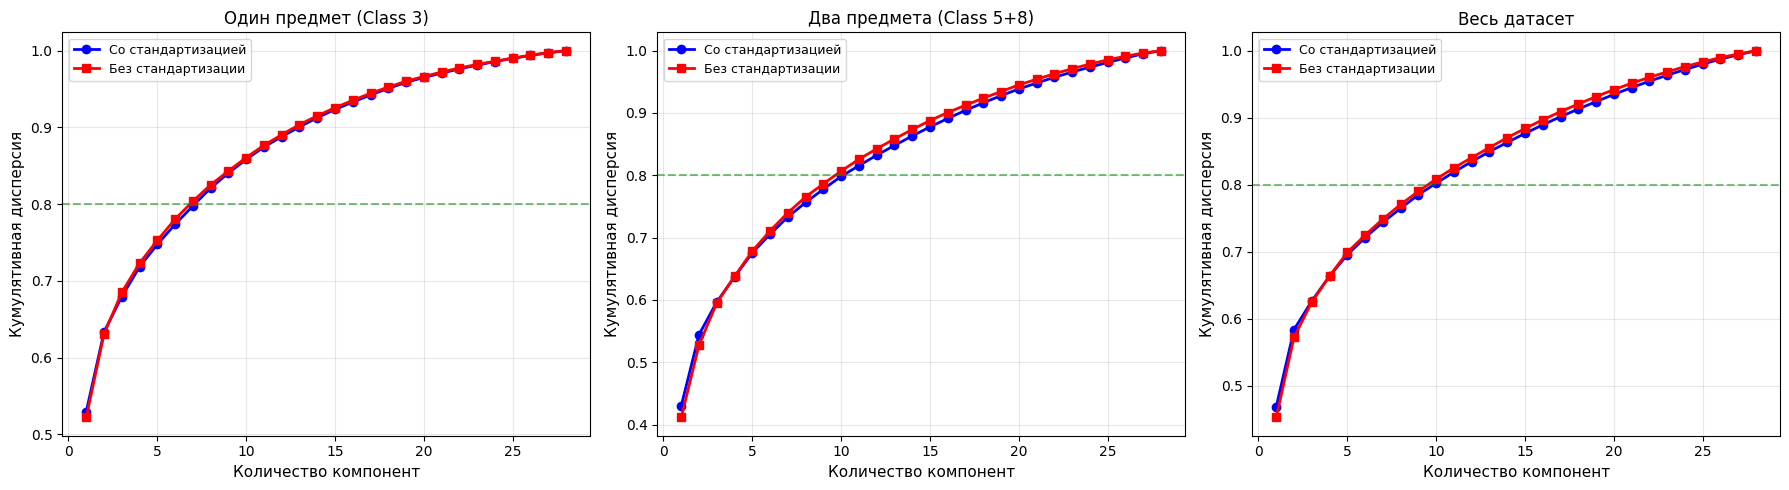


График сохранен: 'pca_standardized_vs_raw_comparison.png'

АНАЛИЗ ДИСПЕРСИЙ ИСХОДНЫХ ПРИЗНАКОВ

Топ-5 признаков по дисперсии:
  1. Q1: 1.3635
  2. Q12: 1.2753
  3. Q27: 1.2174
  4. Q11: 1.1836
  5. Q4: 1.1413

Минимальная дисперсия: 0.724076188945831
Максимальная дисперсия: 1.3634833276901328
Отношение макс/мин: 1.88x

АНАЛИЗ ЗАВЕРШЕН


In [29]:
# ============================================================
# АНАЛИЗ БЕЗ СТАНДАРТИЗАЦИИ
# ============================================================

print("="*70)
print("АНАЛИЗ PCA БЕЗ СТАНДАРТИЗАЦИИ ДАННЫХ")
print("="*70)

# Загрузка данных
question_cols = [f'Q{i}' for i in range(1, 29)]
available_cols = [col for col in question_cols if col in df.columns]

# ============================================================
# ПУНКТ B: ОДИН ПРЕДМЕТ (CLASS 3)
# ============================================================

print("\n" + "="*70)
print("ПУНКТ B: ОДИН ПРЕДМЕТ (CLASS 3) - БЕЗ СТАНДАРТИЗАЦИИ")
print("="*70)

df_class3 = df[df['class'] == 3].copy()
X_class3_raw = df_class3[available_cols].values

# PCA без стандартизации
pca_class3_raw = PCA(svd_solver='full')
pca_class3_raw.fit(X_class3_raw)

print(f"\nОбъясненная дисперсия первых 5 компонент:")
for i in range(5):
    print(f"PC{i+1}: {pca_class3_raw.explained_variance_ratio_[i]:.6f} ({pca_class3_raw.explained_variance_ratio_[i]*100:.2f}%)")

cumulative_raw_1 = np.cumsum(pca_class3_raw.explained_variance_ratio_)
n_comp_80_raw_1 = np.argmax(cumulative_raw_1 >= 0.80) + 1
print(f"\nКоличество компонент для 80% дисперсии: {n_comp_80_raw_1}")

# ============================================================
# ПУНКТ C: ДВА ПРЕДМЕТА (CLASS 5 + CLASS 8)
# ============================================================

print("\n" + "="*70)
print("ПУНКТ C: ДВА ПРЕДМЕТА (CLASS 5 + 8) - БЕЗ СТАНДАРТИЗАЦИИ")
print("="*70)

df_class5 = df[(df['instr'] == 3) & (df['class'] == 5)].copy()
df_class8 = df[(df['instr'] == 3) & (df['class'] == 8)].copy()
df_two = pd.concat([df_class5, df_class8], ignore_index=True)
X_two_raw = df_two[available_cols].values

# PCA без стандартизации
pca_two_raw = PCA(svd_solver='full')
pca_two_raw.fit(X_two_raw)

print(f"\nОбъясненная дисперсия первых 5 компонент:")
for i in range(5):
    print(f"PC{i+1}: {pca_two_raw.explained_variance_ratio_[i]:.6f} ({pca_two_raw.explained_variance_ratio_[i]*100:.2f}%)")

cumulative_raw_2 = np.cumsum(pca_two_raw.explained_variance_ratio_)
n_comp_80_raw_2 = np.argmax(cumulative_raw_2 >= 0.80) + 1
print(f"\nКоличество компонент для 80% дисперсии: {n_comp_80_raw_2}")

# ============================================================
# ПУНКТ D: ВЕСЬ ДАТАСЕТ
# ============================================================

print("\n" + "="*70)
print("ПУНКТ D: ВЕСЬ ДАТАСЕТ - БЕЗ СТАНДАРТИЗАЦИИ")
print("="*70)

X_all_raw = df[available_cols].values

# PCA без стандартизации
pca_all_raw = PCA(svd_solver='full')
pca_all_raw.fit(X_all_raw)

print(f"\nОбъясненная дисперсия первых 5 компонент:")
for i in range(5):
    print(f"PC{i+1}: {pca_all_raw.explained_variance_ratio_[i]:.6f} ({pca_all_raw.explained_variance_ratio_[i]*100:.2f}%)")

cumulative_raw_3 = np.cumsum(pca_all_raw.explained_variance_ratio_)
n_comp_80_raw_3 = np.argmax(cumulative_raw_3 >= 0.80) + 1
print(f"\nКоличество компонент для 80% дисперсии: {n_comp_80_raw_3}")

# ============================================================
# СРАВНИТЕЛЬНАЯ ТАБЛИЦА
# ============================================================

print("\n" + "="*70)
print("СРАВНЕНИЕ: СТАНДАРТИЗАЦИЯ VS НЕТ СТАНДАРТИЗАЦИИ")
print("="*70)

# Предполагается, что переменные pca, pca_two, pca_all из стандартизированного анализа доступны
comparison = pd.DataFrame({
    'Анализ': [
        'Один предмет (Class 3)',
        'Два предмета (Class 5+8)',
        'Весь датасет'
    ],
    'PC1 со станд. (%)': [
        pca.explained_variance_ratio_[0] * 100,
        pca_two.explained_variance_ratio_[0] * 100,
        pca_all.explained_variance_ratio_[0] * 100
    ],
    'PC1 без станд. (%)': [
        pca_class3_raw.explained_variance_ratio_[0] * 100,
        pca_two_raw.explained_variance_ratio_[0] * 100,
        pca_all_raw.explained_variance_ratio_[0] * 100
    ],
    'Комп. для 80% (станд.)': [
        n_comp_80,
        n_comp_80_two,
        n_comp_80_all
    ],
    'Комп. для 80% (без станд.)': [
        n_comp_80_raw_1,
        n_comp_80_raw_2,
        n_comp_80_raw_3
    ]
})

print("\n")
print(comparison.to_string(index=False))

# Вычисление разницы
print("\n" + "="*70)
print("РАЗНИЦА В PC1 (стандартизация - без стандартизации)")
print("="*70)
for i, row in comparison.iterrows():
    diff = row['PC1 со станд. (%)'] - row['PC1 без станд. (%)']
    print(f"{row['Анализ']:30s}: {diff:+.2f}%")

# ============================================================
# ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = [
    ('Один предмет (Class 3)', pca, pca_class3_raw),
    ('Два предмета (Class 5+8)', pca_two, pca_two_raw),
    ('Весь датасет', pca_all, pca_all_raw)
]

for idx, (title, pca_std, pca_raw) in enumerate(datasets):
    cumsum_std = np.cumsum(pca_std.explained_variance_ratio_)
    cumsum_raw = np.cumsum(pca_raw.explained_variance_ratio_)
    
    axes[idx].plot(range(1, len(cumsum_std) + 1), cumsum_std, 
                   marker='o', linewidth=2, label='Со стандартизацией', color='blue')
    axes[idx].plot(range(1, len(cumsum_raw) + 1), cumsum_raw, 
                   marker='s', linewidth=2, label='Без стандартизации', color='red')
    axes[idx].axhline(y=0.80, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
    axes[idx].set_xlabel('Количество компонент', fontsize=11)
    axes[idx].set_ylabel('Кумулятивная дисперсия', fontsize=11)
    axes[idx].set_title(title, fontsize=12)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_standardized_vs_raw_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nГрафик сохранен: 'pca_standardized_vs_raw_comparison.png'")

# ============================================================
# АНАЛИЗ ДИСПЕРСИЙ ПРИЗНАКОВ
# ============================================================

print("\n" + "="*70)
print("АНАЛИЗ ДИСПЕРСИЙ ИСХОДНЫХ ПРИЗНАКОВ")
print("="*70)

variances = df[available_cols].var().sort_values(ascending=False)
print("\nТоп-5 признаков по дисперсии:")
for i, (col, var) in enumerate(variances.head(5).items(), 1):
    print(f"  {i}. {col}: {var:.4f}")

print("\nМинимальная дисперсия:", variances.min())
print("Максимальная дисперсия:", variances.max())
print(f"Отношение макс/мин: {variances.max() / variances.min():.2f}x")

print("\n" + "="*70)
print("АНАЛИЗ ЗАВЕРШЕН")
print("="*70)